In [178]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Lab 1: Text Corpora and Language Modelling

This lab is meant to help you get familiar with some language data, and use this data to estimate N-gram language models

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on blackboard under course materials. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The deadline is **Tuesday 7 nov 16:59**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_lastname1_lastname2.ipynb`, so for example `lab1_Jurafsky_Martin.ipynb`.

* The notebook is graded on a scale of **0-10**. The number of points for each question is indicated in parantheses. 

* The questions marked **optional** are not graded; they are an additional challenge for those interested in going the extra mile. 

Notes on implementation:

* You should **write your code and answers in this iPython Notebook** (see http://ipython.org/notebook.html for reference material). If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical question, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

# 1. Penn treebank

## Exercise 1.1 (40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-22.gold.tagged**. This data is extracted from Sections 02-22 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 10.1** in chapter 10 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/10.pdf)) holds a summary of the 45 POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a litle reading ahead for next week and already have a look at section 10.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/2/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [179]:
import re
from collections import Counter

vocabulary = Counter()
lowercase_vocabulary = Counter()

corpus = open('sec02-21.gold.tagged').read()
lowercase_corpus = corpus.lower()

pattern = r'\s*([^|]+)([|]+)([^|\ ]+)\s*'

regex = re.compile(pattern)

for match in regex.finditer(corpus):
    vocabulary[match.group(1)] += 1
    
for match in regex.finditer(lowercase_corpus):
    lowercase_vocabulary[match.group(1)] += 1

print("Corpus size: {}".format(len(regex.findall(corpus))))
print("Vocabulary Size: {}".format(len(vocabulary)))
print("Lowercase Vocabulary Size: {}".format(len(lowercase_vocabulary)))


Corpus size: 929552
Vocabulary Size: 44210
Lowercase Vocabulary Size: 39384


Answer:

By lowercasing all the words, we can reduce our data size. But words have different meaning between they are at start position(uppercase) and in the middle of sentence(lowercase). Take 'what' as example, when 'what' at the begining of sentence, it could be used for creating an interrogative sentence. But when 'what' is in the middle of sentence, 'what' represents as relative pronoun. If we lowercase all words in the corpus, we will eliminate the dependency between the meaning of words and the position of words in a sentence.

------
For the rest of this exercise you should use the **original orthography** of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**?

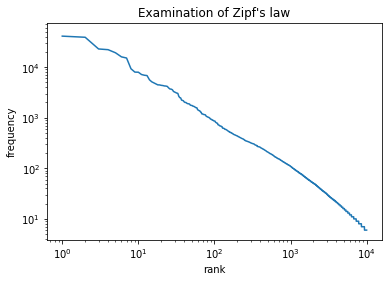

In [180]:
ordered_words = vocabulary.most_common(10000)
frequency = [int(word[1]) for word in ordered_words]
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Examination of Zipf\'s law')
plt.plot(frequency)

Answer: 
Yes it does.


**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [181]:
print("The 20 most common words with their number of occurence: \n {}".format(vocabulary.most_common(20)))
print("The 50th most common word is \"{}\" occuring {} times.".format(vocabulary.most_common(50)[49][0], vocabulary.most_common(50)[49][1]))
print("The 100th most common word is \"{}\" occuring {} times.".format(vocabulary.most_common(100)[99][0], vocabulary.most_common(50)[49][1]))
print("The 1000th most common word is \"{}\" occuring {} times.".format(vocabulary.most_common(1000)[999][0], vocabulary.most_common(50)[49][1]))

The 20 most common words with their number of occurence: 
 [(',', 48310), ('the', 40839), ('.', 38798), ('of', 22782), ('to', 22056), ('a', 19171), ('and', 15906), ('in', 15085), ("'s", 9249), ('that', 7951), ('for', 7912), ('$', 7125), ('is', 6893), ('The', 6791), ('said', 5597), ('on', 5112), ('%', 4871), ('it', 4639), ('by', 4450), ('from', 4437)]
The 50th most common word is "had" occuring 1755 times.
The 100th most common word is "A" occuring 1755 times.
The 1000th most common word is "man" occuring 1755 times.


**(d)** How many different Part-of-speech tags are present in the corpus?

In [182]:
POS_tags = Counter()

for match in regex.finditer(corpus):
    POS_tags[match.group(3)] += 1

print("There are {} different POS tags".format(len(POS_tags)))


There are 48 different POS tags


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [183]:
common_POS = [str(word[0]) for word in POS_tags.most_common(10)]

print("The 10 most common POS tags: {}".format(common_POS))

print("3 most common words in each of the above tags: ")
for POS in common_POS:
    POS_counter = Counter()
    pattern = r'\s*([^| ]+)([|]+)'+POS+'\s+'
    regex = re.compile(pattern)
    
    for match in regex.finditer(corpus):
        POS_counter[match.group(1)] += 1
        
    print("{} tag: {}".format(POS, POS_counter.most_common(3)))

The 10 most common POS tags: ['NN', 'IN', 'NNP', 'DT', 'JJ', 'NNS', ',', '.', 'CD', 'RB']
3 most common words in each of the above tags: 
NN tag: [('%', 4866), ('company', 2457), ('year', 2220)]
IN tag: [('of', 22778), ('in', 14852), ('for', 7907)]
NNP tag: [('Mr.', 4147), ('U.S.', 1577), ('Corp.', 1186)]
DT tag: [('the', 40831), ('a', 19151), ('The', 6753)]
JJ tag: [('new', 1396), ('other', 1298), ('last', 990)]
NNS tag: [('years', 1164), ('shares', 1128), ('sales', 939)]
, tag: [(',', 48310), ('an', 1), ('2', 1)]
. tag: [(',', 48310), ('.', 38798), ('$', 7125)]
CD tag: [('million', 4355), ('billion', 1780), ('one', 1203)]
RB tag: [("n't", 3211), ('also', 1420), ('not', 1287)]


**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage of the words in the vocabulary is **ambiguous**? (i.e. have more than one POS tag?) What are the 10 most frequent combinations of POS tags in the case of ambitguity? Which words are **most ambiguous**? Give some of them.

In [184]:
pattern = r'\s*([^|]+)([|]+)([^|\ ]+)\s*'

regex = re.compile(pattern)
word_dict = {}
ambiguous_words = set()
ambiguous_words_tags = set()
pair_counter = Counter()
ambiguous_words_counter = Counter()

for match in regex.finditer(corpus):
    key = match.group(1)
    word_dict.setdefault(key , set())
    word_dict[key].add(match.group(3))
    
for key, value in word_dict.items():
    if len(value) > 1:
        ambiguous_words.add(key)
        ambiguous_words_tags = ambiguous_words_tags.union(value)
        combos = combinations(value, 2)
        pair_counter += Counter(combos)
        ambiguous_words_counter[key] = len(value)

print("The percentage of ambiguous words is: {}%".format(((len(ambiguous_words)/len(word_dict))*100)))
print("Top 10 most frequent combinations of POS tags in the case of ambitguity: \n {}".format(pair_counter.most_common(10)))
print("Top 10 ambiguous words are: \n {}".format(ambiguous_words_counter.most_common(10)))


The percentage of ambiguous words is: 13.469803211942999%
Top 10 most frequent combinations of POS tags in the case of ambitguity: 
 [(('VBD', 'VBN'), 1060), (('NN', 'JJ'), 891), (('VBP', 'VB'), 654), (('NN', 'NNP'), 626), (('NN', 'VB'), 596), (('JJ', 'VBN'), 452), (('NN', 'VBG'), 378), (('VBZ', 'NNS'), 364), (('JJ', 'NNP'), 292), (('NN', 'VBP'), 290)]
Top 10 ambiguous words are: 
 [('set', 7), ('many', 7), ('open', 7), ('down', 7), ('in', 6), ('that', 6), ('own', 6), ('cut', 6), ('point', 6), ('left', 6)]


**(g)**  Print some of these words with their multiple POS-tags. Do you **understand the ambiguity**? Use figure 10.1 mentioned above to interpret the POS-tags.

In [185]:
for key, value in ambiguous_words_counter.most_common(3):
    print("The word \"{}\" has following POS tags: {}".format(key,word_dict[key]))

The word "set" has following POS tags: {'NN', 'VBD', 'VB', 'VBN', 'JJ', 'VBZ', 'VBP'}
The word "many" has following POS tags: {'NN', 'PDT', 'DT', 'NP', 'JJ', 'VB', 'RB'}
The word "open" has following POS tags: {'NN', 'RP', 'JJ', 'VB', 'VBZ', 'VBP', 'RB'}


Some examples of ambguity are explained below: 

planned:

JJ: planned can be adjective. e.g. planned economy

VBN: planned can be verb, past participle. e.g. I have planned to visit Germany in Christmas vacation.

VB: planned can be verb, base form. e.g. We plan to have lunch at UvA.


around:

RB: around can be adverb. He entered the room and looked around.

IN: around can be preposition. Students gathered around teachers.

RP: around can be particle. Government danced around the most important issue.


complicated:

JJ: complicated can be adjective. e.g. It's complicated

VBN: complicated can be verb, past participle. e.g. Politics have complicated the situation.

VBD: complicated can be verb, past tense. e.g. The fluctuation of temprature was complicated by global warming.

**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [186]:
no_ambiguous_corpus = 0

pattern = r'\s*([^|]+)([|]+)([^|\ ]+)\s*'
regex = re.compile(pattern)

for match in regex.finditer(corpus):
    if match.group(1) in ambiguous_words:
        no_ambiguous_corpus += 1
        
print("{}% of the dataset is ambiguous".format((no_ambiguous_corpus/len(regex.findall(corpus)))*100))
    

55.079005800643756% of the dataset is ambiguous


## Exercise 1.2 (10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** How many **unseen words** are present in the development data (i.e., words that have not occurred in the training data)?

In [187]:
no_unseen = 0
dev_word_dict = {}
unseen_words = set()

development_corpus = open('sec00.gold.tagged').read()
pattern = r'\s*([^|]+)([|]+)([^|\ ]+)\s*'

regex = re.compile(pattern)

for match in regex.finditer(development_corpus):
    key = match.group(1)
    dev_word_dict.setdefault(key , set())
    dev_word_dict[key].add(match.group(3))
    
for key, value in dev_word_dict.items():
    if  key not in word_dict.keys():
        unseen_words.add(key)
        
print("Number of unseen words in the development data: {}".format(len(unseen_words)))
        

Number of unseen words in the development data: 1288


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [188]:
dev_POS_counter = Counter()

for key, value in dev_word_dict.items():
    if  key in unseen_words:
        for POS in value:
            dev_POS_counter[POS] +=1

print("The 3 most common POS categories among the unseen words are: {}".format(dev_POS_counter.most_common(3)))
    

The 3 most common POS categories among the unseen words are: [('NNP', 489), ('JJ', 236), ('NN', 175)]


# 2. Language Models

This part of the lab will be covered in the Wednesday lecture. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 4** of J&M *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more]((https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$


## Exercise 2.1 (25 points)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. **15 points**

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. **10 points**

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses:

In [189]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [190]:
d = dict()
#d["new key"]

Other datatypes as `default_factory`:

In [191]:
d = defaultdict(int)
d["new key"]

0

In [192]:
d = defaultdict(list)
d["new key"]

[]

Converting an already existing `dict`:

In [193]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [194]:
#d = defaultdict(10)

Use a `lambda` to make the number `10` `callable`":

In [195]:
d = defaultdict(lambda: 10)
d["new key"]

10

In [196]:
d = defaultdict(lambda: defaultdict(float))
d["new key"]

defaultdict(float, {})

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [197]:
train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r") as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [199]:
def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """          
    data_copy = data.copy()    
    ngram = defaultdict(Counter) # ngram[history][word] = #(history,word)
    
    if N - 2 > 0:
        for sent_idx, sent in enumerate(data_copy):
            for i in range(0, N-2):
                data_copy[sent_idx] = ["<s>"] + data_copy[sent_idx]    
    unpacked_data = [word for sent in data_copy for word in sent]
    unigram = defaultdict(float, Counter(unpacked_data)) # default prob is 0.0 
    
    V = len(unigram)
    num_of_word_tokens = len(unpacked_data)
    
    for i in range(N-1, len(unpacked_data)):   
        context = tuple(unpacked_data[i - N + 1:i])
        ngram[context][unpacked_data[i]] += 1
        
    for context, count in ngram.items():
        total = sum(count.values())
        for word in count:
            count[word] += k
            count[word] /= float(total+k*V)
        
        ngram[context] = defaultdict(lambda total=total, k=k, V=V: k/float(total+k*V), ngram[context])
                    
    for context, count in unigram.items():
        unigram[context] += k
        unigram[context] /= float(num_of_word_tokens + k*V)
        
    unigram = defaultdict(lambda num_of_word_tokens=num_of_word_tokens, k=k, V=V: k/float(num_of_word_tokens+k*V), unigram)
    return ngram, unigram

data, w2i, i2w = read(train_file)
bigram, unigram = train_ngram(data, N=3, k=0)
bigram_smoothed, unigram_smoothed = train_ngram(data, N=2, k=1)

In [202]:
default_prob = bigram_smoothed[("all", )]["all"] # "all all" does not occur => equals k / (N + kV)
d = bigram_smoothed[("all", )]                    # the smoothed conditional distribution p(w|"all")
s = sum(d.values())                       # total probability mass actually stored in d (< 1.0)
seen = len(d.keys())                      # number of actual words stored in d
unseen = len(w2i) - seen                  # all other words
remaining_prob = default_prob * unseen    # all remaining probability mass not actually stored in d
one = s + remaining_prob                  # should equal 1.0
print(one)

0.9999790417906672


In [203]:
trigram, unigram = train_ngram(data, N=3, k=0)
quadgram, unigram = train_ngram(data, N=4, k=0)

# Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [204]:
from random import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random() # uniformly random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        p += p_i
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

1
Counter({2: 528, 1: 199, 3: 187, None: 86})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [214]:
def generate_sent(lm, N):
    
    sentence = []
    if len(sentence) + 1 <= N - 1:
        for n in range(len(sentence) + 1, N - 1 + 1):
            sentence.append('<s>')                 
        
    ngram, unigram = train_ngram(data, N, 0)  
        
    count = 0
    
    new_word = ''
    while new_word != '</s>':
        count += 1
        if count > 1000:
            break
        tuple_list = []
        
        start_j = len(sentence) - 1 - N + 2
        end_j = len(sentence)
        
        if start_j < 0:
            start_j = 0
        if end_j < 0:
            end_j = 0
        
        for j in range(start_j, end_j):
            
            tuple_list.append(sentence[j])
        tuple_lm = tuple(tuple_list)
        
        s = sample(list(ngram[tuple_lm].values()))
        if s is None:
            s = 0
            new_word = list(ngram[tuple_lm].keys())[s]
        else:
            new_word = list(ngram[tuple_lm].keys())[s]                
        
        if new_word == '</s>':
            break
        sentence.append(list(ngram[tuple_lm].keys())[s])
        
        
    sentence = sentence[N - 1:]
    
    for word in sentence:
        print(word, end=" ")
            

lm = {}
lm[1] = unigram
lm[2] = bigram
lm[3] = trigram
lm[4] = quadgram

print("Unigram generation: ")
generate_sent(lm, 1)
print("\n Bigram generation: ")
generate_sent(lm, 2)
print("\n Trigram generation: ")
generate_sent(lm, 3)
print("\n Quadgram generation: ")
generate_sent(lm, 4)

Unigram generation: 
good When quality Silver good strengthen It it But double-check brought from same answers 'm Here good When correlate findings what 
 Bigram generation: 
If she fits them OncoSearch . 
 Trigram generation: 
Every foot of the diversity and incredible experiences . 
 Quadgram generation: 
Social capital in the U . 

### [Optional]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [219]:
### ANSWER ###

## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

ValueError: not enough values to unpack (expected 2, got 0)

(a)
When $C(w_{n-1})$ is relatively big, the change of denominator caused by V is relative small.
But for infrequent words, V has big impact on denominator, so the probability could be a small value.

(b)
If k is slightly large than 0, it will decrease the effect of smoothing and more close to the result of without smoothing. But it's worth to notice that even if k is small, V still has big impact on infrequent words.


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [220]:
trigram_smoothed, unigram_smoothed = train_ngram(data, N=3, k=1)

In [221]:
def compute_sentence_probability(sentence, gram, N):
    sentence = sentence.split(' ')
    original_sentence = sentence
    
    sentence = original_sentence
    if N >= 2:
        for n in range(N-1):
            sentence = ['<s>'] + sentence
    
    probability = 1        
    for idx_word, word in enumerate(sentence):
                  
        tuple_list = []
        window_size = N
        if idx_word < window_size - 1:
            continue
        window_start = idx_word - window_size + 1
        window_end = idx_word

        for j in range(window_start, window_end, 1):               
            tuple_list.append(sentence[j])          

        tuple_words = tuple(tuple_list)        
        
        if N == 1:
            probability *= gram[word]
        else:                            
            probability *= gram[tuple_words][word]
            
    return probability
    
sentence1 = 'Every day was about creating something new .'
grams = {1: unigram, 2: bigram, 3: trigram}
grams_smoothed = {1: unigram_smoothed, 2: bigram_smoothed, 3: trigram_smoothed}                

print("Sentence1 without smoothing: ")
for N, gram in grams.items():
    probability = compute_sentence_probability(sentence1, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

print()
    
print("Sentence1 with smoothing: ")
for N, gram in grams_smoothed.items():
    probability = compute_sentence_probability(sentence1, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

print()
    
sentence2 = 'In this machine , a beam of protons and anti-protons are accelerated to near the \
speed of light and brought together in a collision , producing a burst of pure energy .'

print("Sentence2 without smoothing: ")
for N, gram in grams.items():
    probability = compute_sentence_probability(sentence2, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))
    
print()
    
print("Sentence2 with smoothing: ")
for N, gram in grams_smoothed.items():
    probability = compute_sentence_probability(sentence2, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

Sentence1 without smoothing: 
1-gram probability: 1.8753980578293063e-24
2-gram probability: 0
3-gram probability: 1.241092166741438e-11

Sentence1 with smoothing: 
1-gram probability: 2.4178740677475678e-24
2-gram probability: 1.7626843091651718e-26
3-gram probability: 1.3301406368835432e-32

Sentence2 without smoothing: 
1-gram probability: 6.736263286271308e-101
2-gram probability: 0
3-gram probability: 3.570432747502253e-31

Sentence2 with smoothing: 
1-gram probability: 4.3471454835405504e-100
2-gram probability: 2.0095422945886214e-116
3-gram probability: 5.334908390126462e-134


Smoothing will lower the probability. Because for smoothing, we have to lower the probability of each word in vocabulary such that whole probability sum up to 1.

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [222]:
test_file = "ted-test.txt"
test_data, w2i, i2w = read(test_file)

In [223]:
sentence1 = 'Because these robots are really safe .'
for N, gram in grams.items():
    probability = compute_sentence_probability(sentence1, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

print()
    
for N, gram in grams_smoothed.items():
    probability = compute_sentence_probability(sentence1, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))    

print()

sentence2 = 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every \
conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible \
reality .'

for N, gram in grams.items():
    probability = compute_sentence_probability(sentence2, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

print()
    
for N, gram in grams_smoothed.items():
    probability = compute_sentence_probability(sentence2, gram, N)
    print(str(N) + '-gram probability: ' + str(probability))

1-gram probability: 8.42197637384407e-22
2-gram probability: 0
3-gram probability: 0.0

1-gram probability: 1.0534356800803786e-21
2-gram probability: 9.379248193377376e-24
3-gram probability: 2.433779391360207e-30

1-gram probability: 5.252696069880247e-119
2-gram probability: 0
3-gram probability: 0.0

1-gram probability: 2.9022194676384047e-118
2-gram probability: 1.356862482398554e-126
3-gram probability: 0.0


For sentence 1, we can see that the probability of trigram without smoothing is zero, and after smoothing, the probability becomes positive value. Because smoothing add small probability for those seen history and unseen word which make whole probability larger than 0.

For sentence 2, which is longer than sentence 1, we can see that smoothing also make the probability of bigram  is larger than 0, but smoothing failed to make the probability of trigram is not zero. We think it's because there is some unseen history in test data, which make trigram\[unseen history\][word] is 0. So the whole probability is still 0.

### [Optional]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [ ]:
### ANSWER HERE ###

## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [224]:
perplexity = []
normal_probability = []
count = 0
for sentence in data:        
    count += 1
    if count > 10:
        break
    sentence_str = ''
    
    for word in sentence:
        if word == '<s>' or word == '</s>':
            continue
        sentence_str += word + ' '
        
    sentence_str = sentence_str[:-1]
    probability = compute_sentence_probability(sentence_str, bigram_smoothed, 2)    
    normal_probability += [probability]    
    perplexity += [probability ** (1 / len(sentence))]

In [225]:
print('Perplexity: ')
print(perplexity[0:5])
print()
print('Probability: ')
print(normal_probability[0:5])

Perplexity: 
[0.0017834827952319637, 0.0004117950929036414, 0.004734512063930554, 0.002370264464460582, 0.005629758668100014]

Probability: 
[1.9130358308954124e-69, 2.328247673425317e-85, 3.0177194890110257e-40, 7.481419850163536e-14, 1.8004769297873189e-25]


The value of perplexity is relatively large, it narrows the difference between the probability of words. The negative inverse power of N normalizes the number of words

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). The project on language modelling will involve learning more about these methods. 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))